In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Успеваемость учащихся на экзаменах 
Оценки, полученные студентами в колледже 
Цель Понимать влияние различных факторов, таких как экономические, личные и социальные, на успеваемость учащихся. 

Выводы будут: 
1. Как повысить успеваемость учащихся в каждом тесте? 
2. Каковы основные факторы, влияющие на результаты теста? 
3. Эффективность курса подготовки к экзаменам? 
4. Другой вывод

In [178]:
student_df = pd.read_csv('/Users/yanaprynik/Work_doc/StudentsPerformance.csv') # прочитаем файл и посмотрим на нашу таблицу
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [179]:
passmark = 40 # установим минимальный балл для прохождения экзамена

In [180]:
display(student_df.describe()) # посмотрим на общие данные, такие как mean, std, min, max, median.
display(student_df.mode())

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,65,72,74


По данным видно, что среднее значение и медиана и мода примерно одинаковые. К тому же данные симметричные. Так что можем судить, что распределение нормальное.

In [181]:
student_df.isnull().sum() # проверим, есть ли пропущеные значения в столбцах. 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

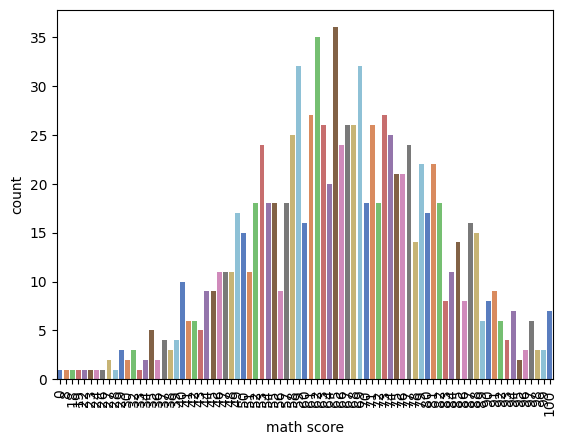

In [182]:
p = sns.countplot(x="math score", data = student_df, palette="muted") # Рассмотрим сначала оценки по математике
_ = plt.setp(p.get_xticklabels(),rotation=90) 

In [183]:
student_df['Math_Status'] = np.where(student_df['math score']<passmark, 'Fail', 'Compl') # сделаем новый столбец с показателями сдал, не сдал
student_df.Math_Status.value_counts() 

Compl    960
Fail      40
Name: Math_Status, dtype: int64

Как видно, 960 учеников успешно прошли экзамен. А 40 провалилась. Посмотрим в разрезе 

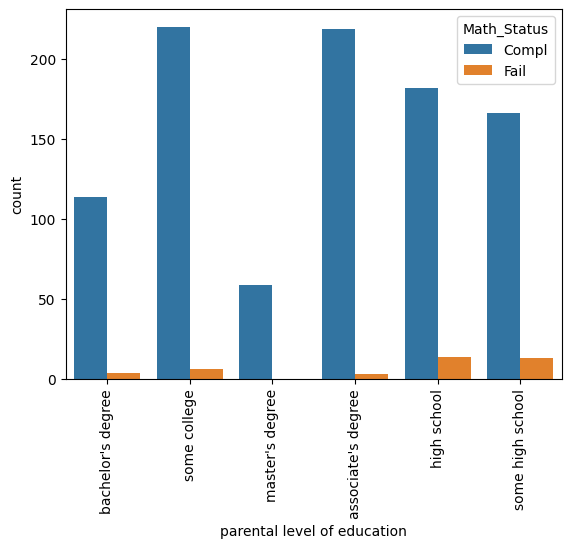

In [184]:
p = sns.countplot(data=student_df, x='parental level of education', hue='Math_Status')
_ = plt.setp(p.get_xticklabels(),rotation=90)

Из графика видно, что больше всего, не сдало экзамен - это учащиеся у которых родители получили образование средней школы. 

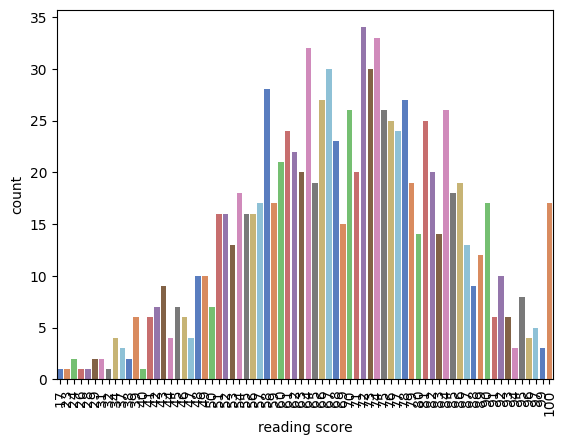

In [185]:
p = sns.countplot(x="reading score", data = student_df, palette="muted") # Рассмотрим сначала оценки по чтению
_ = plt.setp(p.get_xticklabels(),rotation=90) 

Из графика видно, что данное распределение похоже на оценки по математике, но визуально видно, что в среднем показатели немного выше. Особенно 100 бальные оценки за экзамен.

In [186]:
student_df['Reading_Status'] = np.where(student_df['reading score']<passmark, 'Fail', 'Compl') 
student_df.Reading_Status.value_counts() # уже можем наблюдать, что показатели выше

Compl    974
Fail      26
Name: Reading_Status, dtype: int64

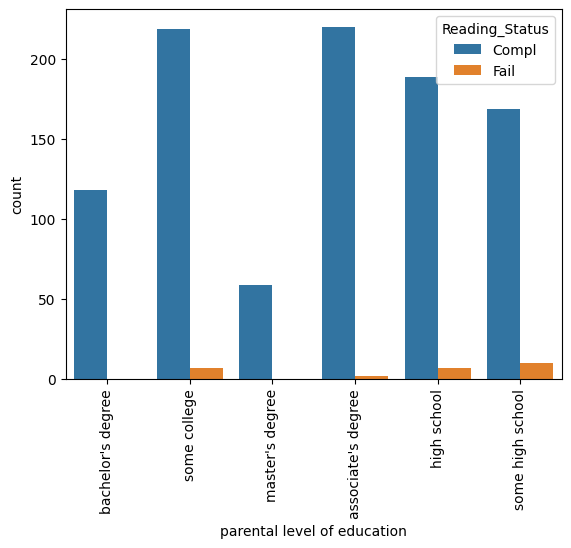

In [187]:
p = sns.countplot(data=student_df, x='parental level of education', hue='Reading_Status')
_ = plt.setp(p.get_xticklabels(),rotation=90)

Так же наблюдаем тенденцию. Больший процент проваливших экзамен - это ученики, родители которых имеют образование средней школы или колледжа. 

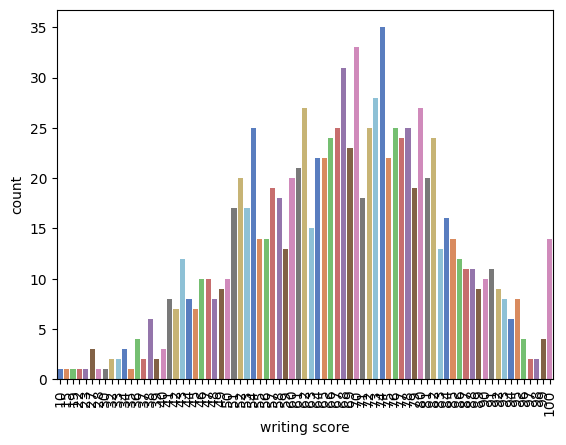

In [188]:
p = sns.countplot(x="writing score", data = student_df, palette="muted") # Рассмотрим сначала оценки по чтению
_ = plt.setp(p.get_xticklabels(),rotation=90) 

In [189]:
student_df['Writing_Status'] = np.where(student_df['writing score']<passmark, 'Fail', 'Compl') 
student_df.Writing_Status.value_counts() # наблюдаем, что показатели выше чем у математики, но ниже чтения

Compl    968
Fail      32
Name: Writing_Status, dtype: int64

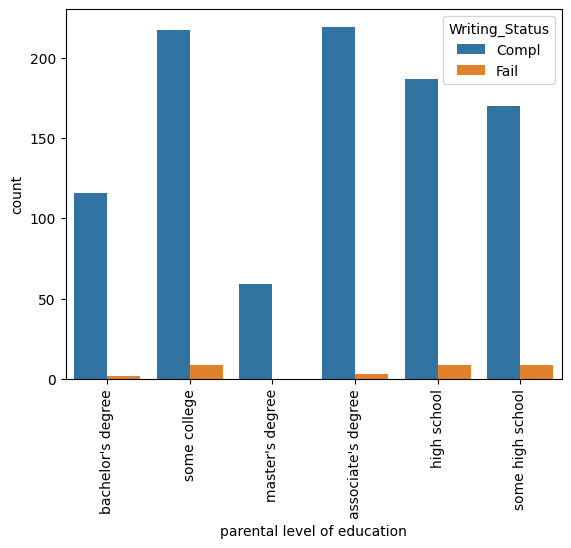

In [190]:
p = sns.countplot(data=student_df, x='parental level of education', hue='Writing_Status')
_ = plt.setp(p.get_xticklabels(),rotation=90)

Картина практически такая же. Студенты с образованием родителей средней школы и колледжа имеют наивысший процент не сдавших.  Но стоит заметить, что при проходном балле в 40. Наблидаем низкий процент проваливших экзамены. 4% по математике, 2.6% по чтению и 3.2% по правописанию. 

In [191]:
student_df['All_Status'] = student_df.apply(lambda x: 'Fail' if x['Math_Status'] == 'Fail' 
                                            or x['Reading_Status'] == 'Fail' 
                                            or x['Writing_Status'] == 'Fail' 
                                            else 'Compl', 
                                            axis=1)
student_df.All_Status.value_counts()

Compl    949
Fail      51
Name: All_Status, dtype: int64

Сейчас видим, что всего 5.1% от всех учащихся не сдал хотя бы 1 экзамен.

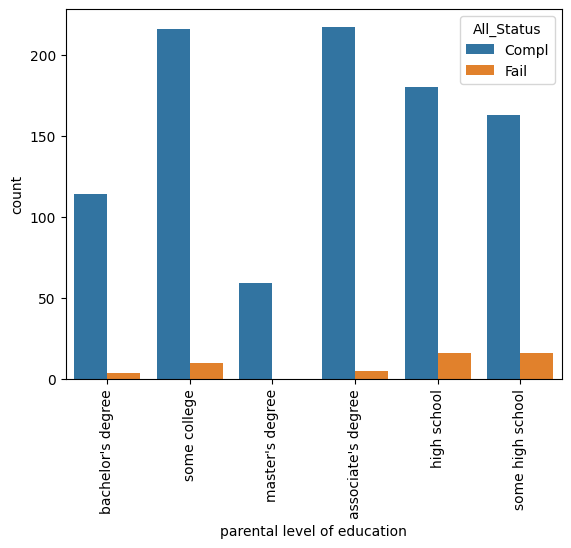

In [192]:
p = sns.countplot(data=student_df, x='parental level of education', hue='All_Status')
_ = plt.setp(p.get_xticklabels(),rotation=90)

Так же картина понятная. Школы и колледжы занимают больший процент не сдавших хоть один экзамен. 

In [193]:
student_df['OverAll_status'] = student_df.apply(lambda x: 'Fail' if x['Math_Status'] == 'Fail' 
                                            and x['Reading_Status'] == 'Fail' 
                                            and x['Writing_Status'] == 'Fail' 
                                            else 'Compl', 
                                            axis=1)
student_df.OverAll_status.value_counts()

Compl    982
Fail      18
Name: OverAll_status, dtype: int64

Посмотрим на то, сколько студентов не сдало все экзамены. 1.8% от общего количества. 

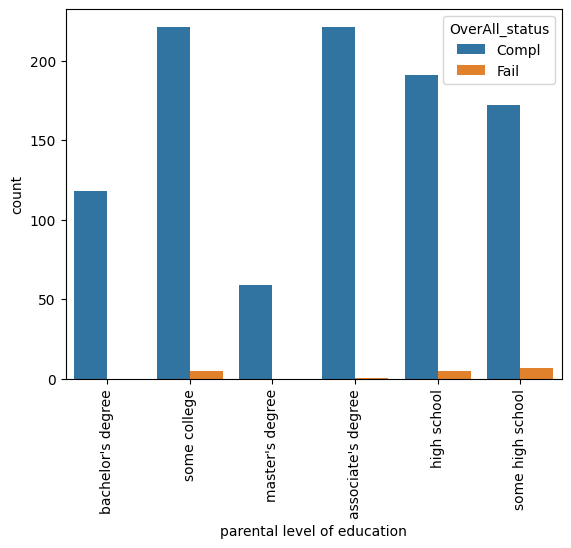

In [194]:
p = sns.countplot(data=student_df, x='parental level of education', hue='OverAll_status')
_ = plt.setp(p.get_xticklabels(),rotation=90)

Видим, что почти все наблюдения привязаны к отдной и той же тенденции.  Тогда постараемся сделать промежуточный вывод. Как видно из наблюдений, студенты у которых родители без какой либо ученой степени проваливают экзамены гораздо чаще. Так что, скорее всего будем рассматривать и делать акцент на сегментацию учеников по их родителям. А уже потом посмотрим какие группы внутри наших кластеров имеют лучшие показатели.

Выделим отдельные таблицы для наших учеников с групировкой по образованию родителей. Для более удобной работы.

In [195]:
some_high_school = student_df[student_df['parental level of education'] == 'some high school']
high_school = student_df[student_df['parental level of education'] == 'high school']
some_college = student_df[student_df['parental level of education'] == 'some college']
associate = student_df[student_df['parental level of education'] == "associate's degree"]
print(some_high_school.shape)
print(high_school.shape)
print(some_college.shape)
print(associate.shape)

(179, 13)
(196, 13)
(226, 13)
(222, 13)


Кол-во учащихся в наших выделеных кластерах достигает 60% от общего кол-ва учащихся. Поэтому решил выделить еще одну группу. С уровнем образования - младшего специалиста. Что бы общая выборка была 82.3%. Максимально приблизить результат наблюдений.

Далее что мы хотим видеть? в нашей таблице есть еще несколько признаков, по которым можно анализировать студентов. Возьмем все, кроме национальности (как-то это не этично последнее время сравнивать их). Итак у нас есть: 
1. Пол
2. Уровень обеда
3. Прохождение курса подготовки к экзамену. 

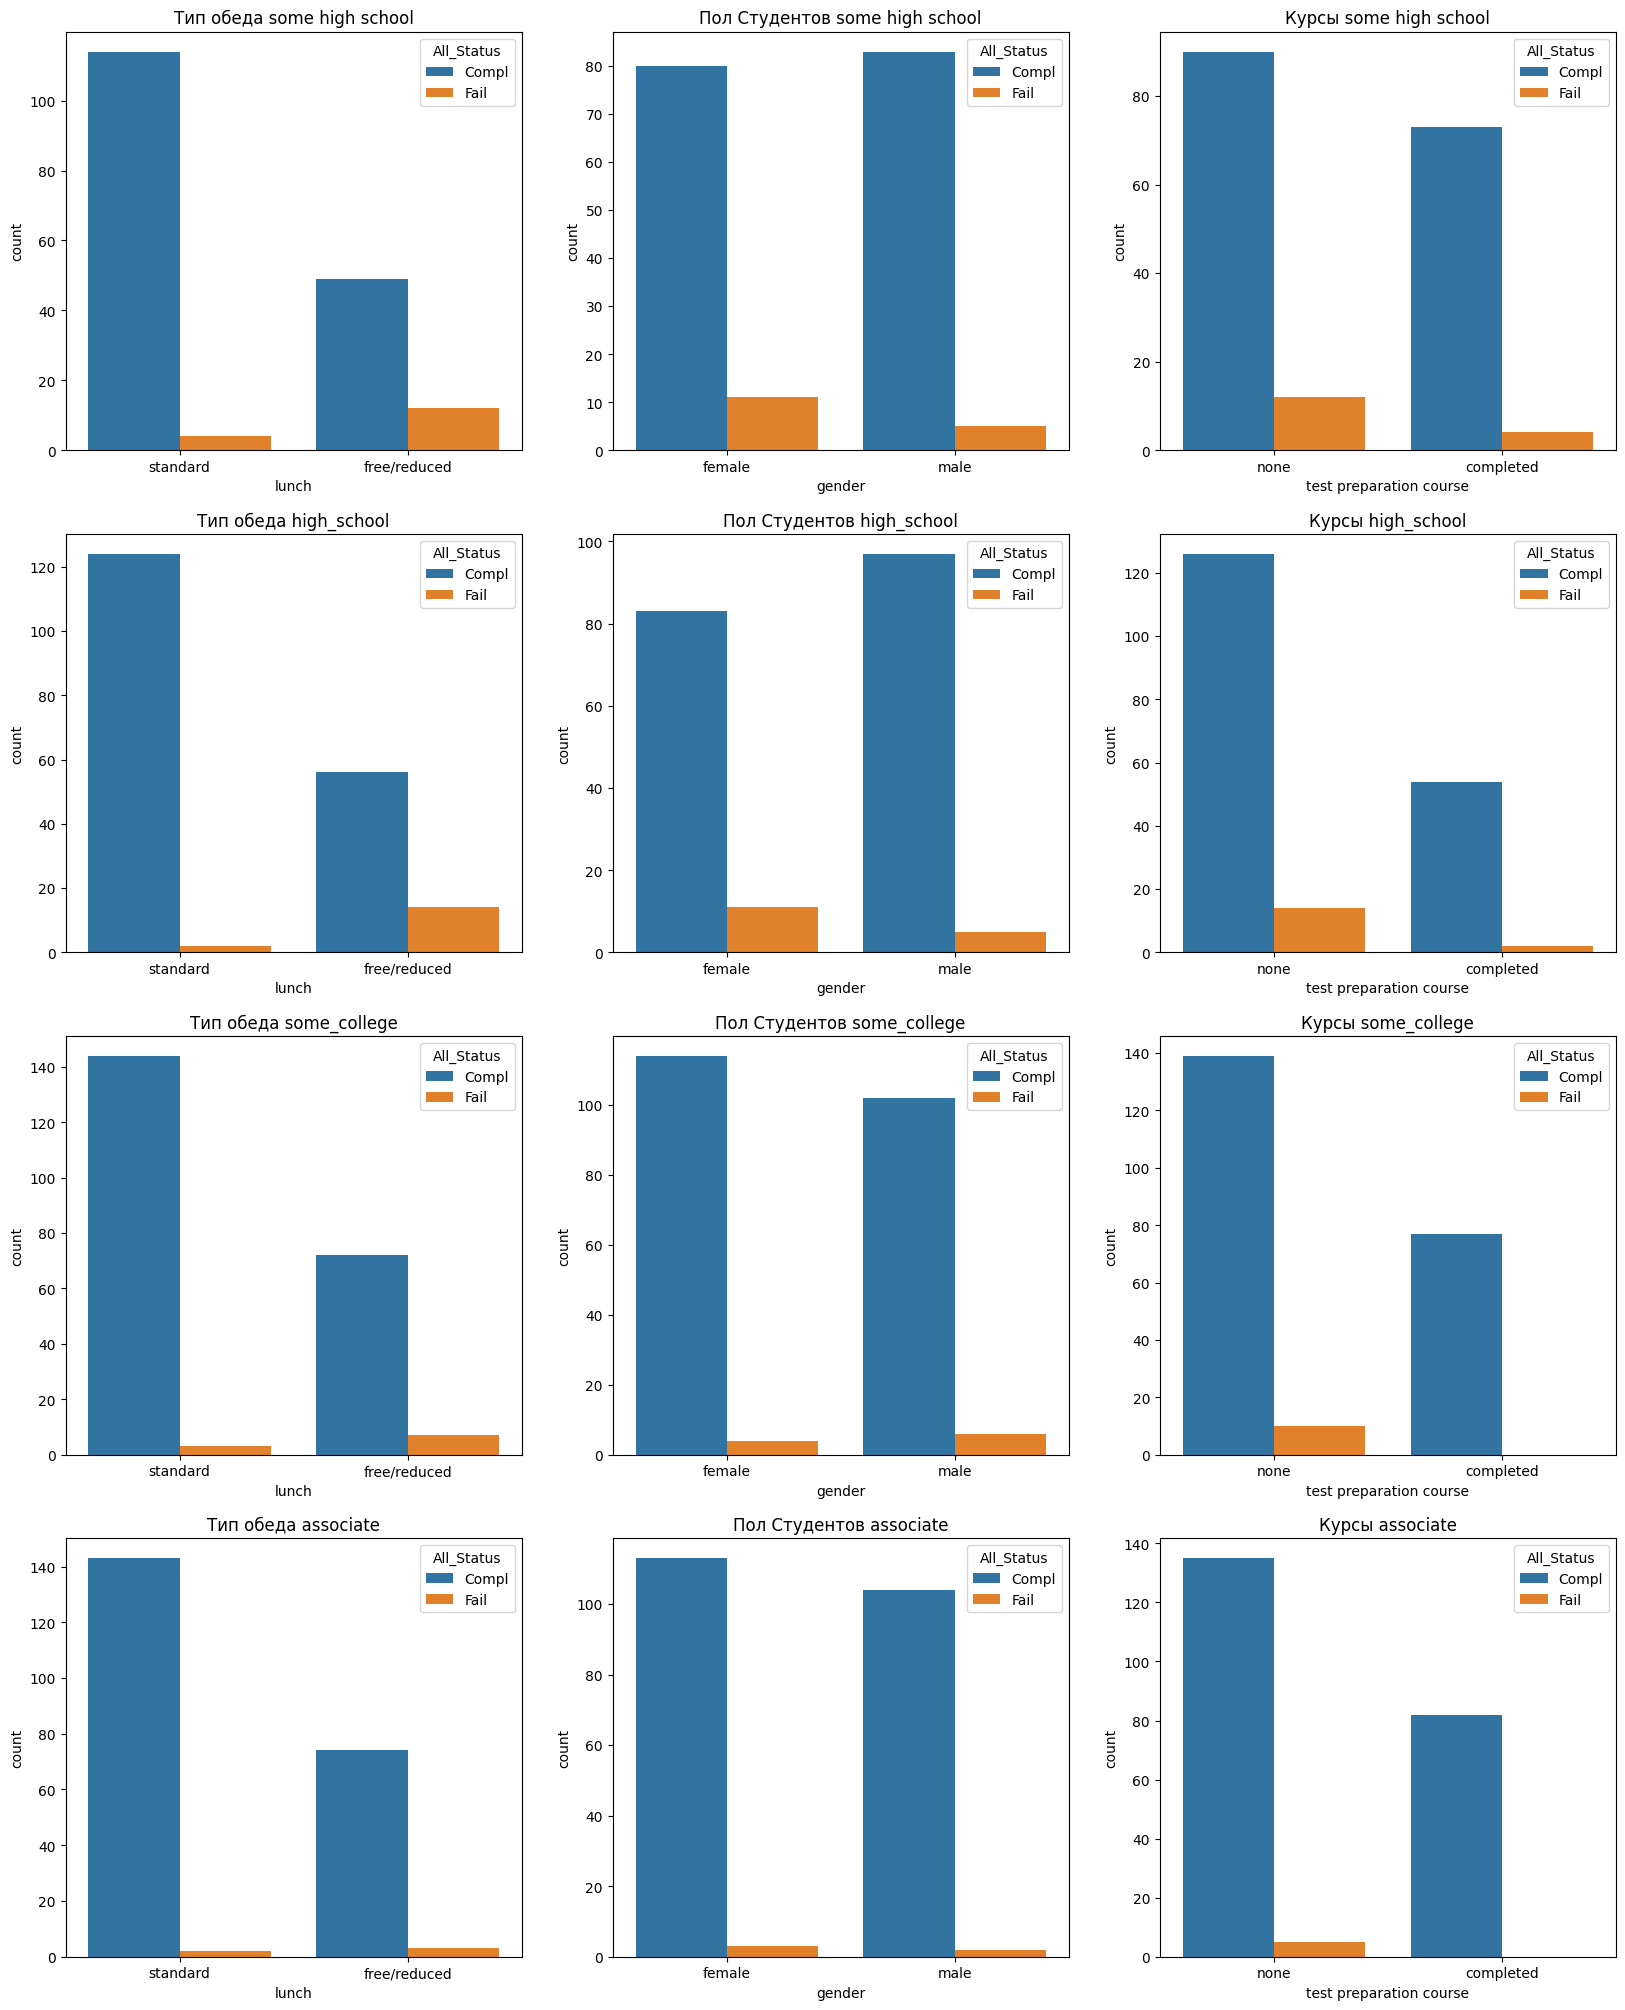

In [196]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(ncols=3,nrows=4, figsize =(20,25))

sns.countplot(data=some_high_school, x='lunch', order=['standard','free/reduced'], hue ='All_Status', ax=ax1)
ax1.set_title('Тип обеда some high school')

sns.countplot(data=some_high_school, x='gender', order=['female','male'],hue ='All_Status', ax=ax2)
ax2.set_title('Пол Студентов some high school')

sns.countplot(data=some_high_school, x='test preparation course', order=['none','completed'], hue ='All_Status', ax=ax3)
ax3.set_title('Курсы some high school')


sns.countplot(data=high_school, x='lunch', order=['standard','free/reduced'], hue ='All_Status', ax=ax4)
ax4.set_title('Тип обеда high_school')

sns.countplot(data=high_school, x='gender', order=['female','male'], hue ='All_Status', ax=ax5)
ax5.set_title('Пол Студентов high_school')

sns.countplot(data=high_school, x='test preparation course', order=['none','completed'], hue ='All_Status', ax=ax6)
ax6.set_title('Курсы high_school')


sns.countplot(data=some_college, x='lunch', order=['standard','free/reduced'], hue ='All_Status', ax=ax7)
ax7.set_title('Тип обеда some_college')

sns.countplot(data=some_college, x='gender', order=['female','male'], hue ='All_Status', ax=ax8)
ax8.set_title('Пол Студентов some_college')

sns.countplot(data=some_college, x='test preparation course', order=['none','completed'], hue ='All_Status', ax=ax9)
ax9.set_title('Курсы some_college')


sns.countplot(data=associate, x='lunch', order=['standard','free/reduced'], hue ='All_Status', ax=ax10)
ax10.set_title('Тип обеда associate')

sns.countplot(data=associate, x='gender', order=['female','male'], hue ='All_Status', ax=ax11)
ax11.set_title('Пол Студентов associate')

sns.countplot(data=associate, x='test preparation course', order=['none','completed'], hue ='All_Status', ax=ax12)
ax12.set_title('Курсы associate')

plt.show()


Как можно заметить. Из графиков, зависит на успеваемость не только образование родителей. Но и другие факторы. 

Во первых видно, что девушки в первых двух случаях имеют больший процент не сдачи экзамена, чем мальчики. Но к сожалению как на первый фактор(родителей), так и на этот мы не можем повлиять.

Во вторых. Необходимо обратить внимание на обед и подготовку к экзаменам. На графике видно, что все группы имеют больший процент неудач с бесплатным ланчем и отсутствием курсов. Это говорит нам о том, что на эти два фактора можно и даже нужно повлиять. 

В третих. Группа которая была добавлена последней - associate. имеет практически одинаковые результать, но он доказательство того, что студенты без курсов имеют повышенный шанс к провалу на экзамене.

Теперь посмотрим на сколько вообще успешны наши студенты. А именно какая средняя оценка за все предметы.

In [197]:
student_df['Total_Marks'] = student_df['math score'] + student_df['reading score'] + student_df['writing score']
student_df['mean_marks'] = student_df['Total_Marks'] / 3

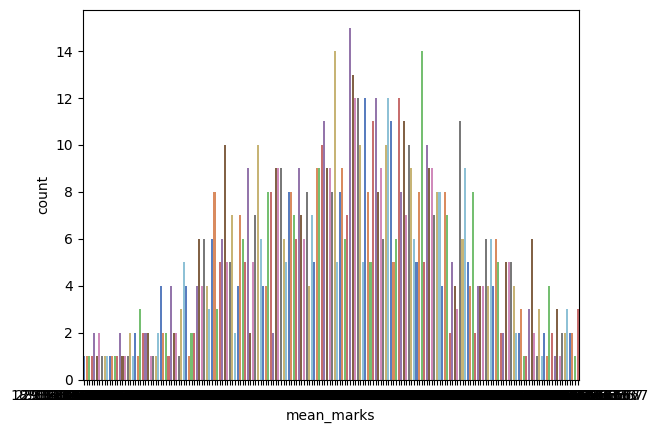

In [198]:
p = sns.countplot(x="mean_marks", data = student_df, palette="muted") # Рассмотрим сначала оценки по чтению
_ = plt.setp(p.get_xticklabels(),rotation=0) 

In [199]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_Status,Reading_Status,Writing_Status,All_Status,OverAll_status,Total_Marks,mean_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,Compl,Compl,Compl,Compl,Compl,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,Compl,Compl,Compl,Compl,Compl,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,Compl,Compl,Compl,Compl,Compl,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,Compl,Compl,Compl,Compl,Compl,148,49.333333
4,male,group C,some college,standard,none,76,78,75,Compl,Compl,Compl,Compl,Compl,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Compl,Compl,Compl,Compl,Compl,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,Compl,Compl,Compl,Compl,Compl,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,Compl,Compl,Compl,Compl,Compl,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,Compl,Compl,Compl,Compl,Compl,223,74.333333


Определим оценки:

выше 85 = класс А
от 75 до 85 = класс B
от 65 до 75 = класс C
от 55 до 65 = класс D
от 40 до 55 = класс E
ниже 40 = оценка F (означает не сдал)

C    277
B    208
D    208
E    140
A    116
F     51
Name: Grade, dtype: int64


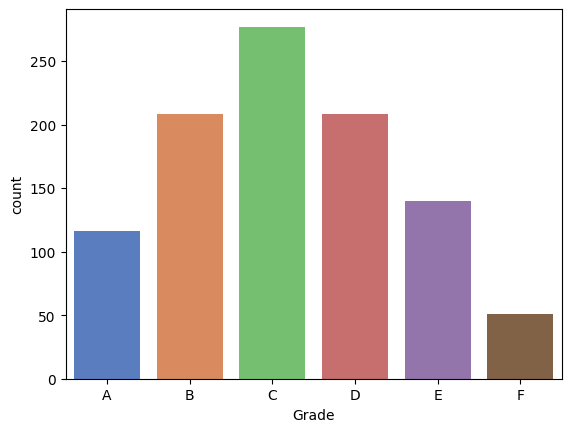

In [200]:
def GetGrade(All_Status, mean_marks):
    if All_Status == 'Fail':
        return 'F'
    if mean_marks >=85:
        return 'A'
    if mean_marks >=75:
        return 'B'
    if mean_marks >=65:
        return 'C'
    if mean_marks >=55:
        return 'D'
    if mean_marks >=40:
        return 'E'
    else:
        return 'F'
    
student_df['Grade'] = student_df.apply(lambda x: GetGrade(x['All_Status'], x['mean_marks']), axis=1)
print(student_df.Grade.value_counts())

sns.countplot(x="Grade", data = student_df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()


И того мы видим, что в основном оценки у студентов положтельные. Преобладают оценки В, С, D. Так что, успеваемость чуть выше среднего исходя из графика. 

Далее что мы заметили в ходе исследования - это то, что в основном на плохие результаты, вылияет образование родителей, качество обеда и прохождение дополнительной подготовки.
В общей статистике только 5% уащихся не смогло сдать экзамен, но если смотреть на график оценок, то уже кажется, что не так уж и мало. 

Подводя итог, можно сказать, что дополнительные (скорее всего платные услуги (обед и курсы) влияют на успеваемость студетов). И это именно те факторы, на которые можно повлиять. Возможно снизить ценны, сделать бесплатные обеды более качественные, а доп. занятия бесплатными. 